# Graph I
Our first LangGraph graph!

In [16]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks in your application using a graph structure

In [17]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict): # Our state schema
    message : str 


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message'] = "Hey " + state["message"] + ", how is your day going?"

    return state 

In [18]:
graph = StateGraph(AgentState)

graph.add_node("omar", greeting_node)

graph.set_entry_point("omar")
graph.set_finish_point("omar")

app = graph.compile()

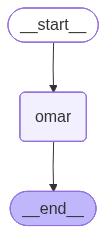

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"message": "Shawky"})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [23]:
result["message"]

'Hey Shawky, how is your day going?'